# Model Management


## Get the dataset

A dataset is a bucket collection of Items (files), their metadata and annotations. It can have a file-system-like structure with folders and subfolders at any level. A dataset is mapped to a Driver (which derives from an Integration), to contain items synced from external cloud storage. Dataset versioning actions include cloning and merging.

We will be using the datasets that we have already set up for you.

In [ ]:
import dtlpy as dl

# project_id is automatically set by the notebook 
project_id = 'project_id'

project = dl.projects.get(project_id=project_id)

dataset = project.datasets.get(dataset_name="V2 Plant Seedlings - Annotated")

print('Got dataset: {} sucessfully'.format(dataset.name))

### 1. Model Get

In [ ]:
model = project.models.get(model_name='pretrained-resnet')
print('Got model: {} sucessfully'.format(model.name))

### 2. Model deploy

In case that the model is already ready for production, deploy it by the following command

In [ ]:
model.deploy()
print('Model deployed successfully')

  
  
## Refresh the page

  
Click the refresh button to see the files uploaded to the dataset

<style>
    button {
        background-color: #3452ff;
        color: #ffffff;
        border: none;
        border-radius: 4px;
        padding: 10px 20px;
        cursor: pointer;
        font-size: 14px;
        font-weight: 500;
        transition: background-color 0.3s;
    }

    button:hover {
        background-color: #7b8cff;
    }
</style>

<button id="RefreshButtonJupyter">Refresh the page</button>
 
  


# 3. Clone Model

To train the pretrained model, we need to clone existing model first and add the dataset, that will be used for training.

In [ ]:
clone_model = model.clone(model_name='my pretrained resnet',
                          dataset=dataset,
                          description='pretrained cloned into my project')

print('Model cloned successfully')

  
  
## Refresh the page

  
Click the refresh button to see the files uploaded to the dataset

<style>
    button {
        background-color: #3452ff;
        color: #ffffff;
        border: none;
        border-radius: 4px;
        padding: 10px 20px;
        cursor: pointer;
        font-size: 14px;
        font-weight: 500;
        transition: background-color 0.3s;
    }

    button:hover {
        background-color: #7b8cff;
    }
</style>

<button id="RefreshButtonJupyter">Refresh the page</button>
 
  


### 4. Model Train

To train a model on a dataset we need to add the train and validation filters to the model, that will help to split the data to train and validation dataloaders.

In [ ]:
train_filters = dl.Filters(field="metadata.system.tags.train", values=True)
validation_filters = dl.Filters(field="metadata.system.tags.validation", values=True)

clone_model.add_subset(subset_name="train", subset_filter=train_filters)
clone_model.add_subset(subset_name="validation", subset_filter=validation_filters)
clone_model.update(system_metadata=True)

execution = clone_model.train(service_config={
    "name": "resnet-train-evaluate",
    "runtime": {
        "podType": "regular-m",
        "concurrency": 1,
        "runnerImage": "gcr.io/viewo-g/piper/agent/runner/apps/torch-models:0.1.4",
        "autoscaler": {
            "type": "rabbitmq",
            "minReplicas": 0,
            "maxReplicas": 2,
            "queueLength": 100
        }
    }
})

print('Model training started successfully')

  
  
## Refresh the page

  
Click the refresh button to see the files uploaded to the dataset

<style>
    button {
        background-color: #3452ff;
        color: #ffffff;
        border: none;
        border-radius: 4px;
        padding: 10px 20px;
        cursor: pointer;
        font-size: 14px;
        font-weight: 500;
        transition: background-color 0.3s;
    }

    button:hover {
        background-color: #7b8cff;
    }
</style>

<button id="RefreshButtonJupyter">Refresh the page</button>
 
  


Wait for the training to finish, this can take aproximatelly 7 minutes.

In [ ]:
execution.wait()
print('Model training finished successfully')

You can snavigate to training tab to see progress. (It is not autorefreshed, so hit refresh button to see new changes)
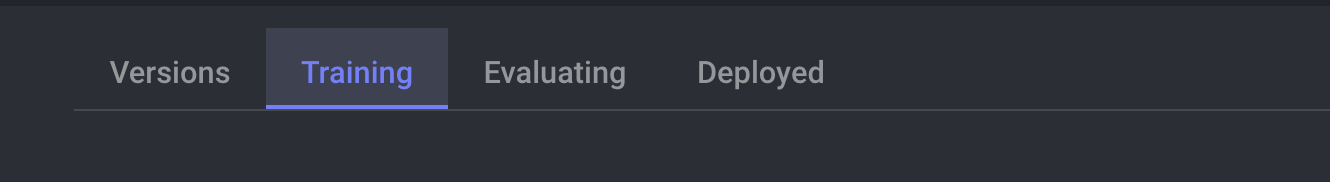

  
  
## Refresh the page

  
Click the refresh button to see the files uploaded to the dataset

<style>
    button {
        background-color: #3452ff;
        color: #ffffff;
        border: none;
        border-radius: 4px;
        padding: 10px 20px;
        cursor: pointer;
        font-size: 14px;
        font-weight: 500;
        transition: background-color 0.3s;
    }

    button:hover {
        background-color: #7b8cff;
    }
</style>

<button id="RefreshButtonJupyter">Refresh the page</button>
 
  


### 5. Model Predict

First, get the spesifc item we want to perfrom prediction with our model

In [ ]:
item_filename = '/Black-grass/6.png'

item = dataset.items.get(filepath=item_filename)
print('Got item: {} sucessfully'.format(item.filename))

Run the model predict method on the item.

Notice: Since the predict method expect to recive a list of item ids, we will add the item id to a list that will be sent to the method.

In [ ]:
model = project.models.get(model_name='pretrained-resnet')
model.predict(item_ids=[item.id])

print('Model prediction finished successfully')

### 6. Model Evaluate

Notice: To evaluate a model we need to:
1. Get a dataset, that will be used for the evaluation.
2. Define the test filters, to build the test dataloader.

In [ ]:
test_filters = dl.Filters(field='metadata.system.tags.test', values=True)

execution = clone_model.evaluate(dataset_id=dataset.id,
                     filters=test_filters,
                                service_config={
    "name": "resnet-train-evaluate",
    "runtime": {
        "podType": "regular-m",
        "concurrency": 1,
        "runnerImage": "gcr.io/viewo-g/piper/agent/runner/apps/torch-models:0.1.4",
        "autoscaler": {
            "type": "rabbitmq",
            "minReplicas": 0,
            "maxReplicas": 2,
            "queueLength": 100
        }
    }
})

print('Model evaluation started successfully')

  
  
## Refresh the page

  
Click the refresh button to see the files uploaded to the dataset

<style>
    button {
        background-color: #3452ff;
        color: #ffffff;
        border: none;
        border-radius: 4px;
        padding: 10px 20px;
        cursor: pointer;
        font-size: 14px;
        font-weight: 500;
        transition: background-color 0.3s;
    }

    button:hover {
        background-color: #7b8cff;
    }
</style>

<button id="RefreshButtonJupyter">Refresh the page</button>
 
  


In [ ]:
execution.wait()
print('Model evaluation finished successfully')